In [1]:
import sys
sys.path.append('../')
sys.path.append('/Users/sdbykov/work/my_packages/nway')

In [2]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import fits_to_pandas, pandas_to_fits, assess_goodnes_nway_cross_match, assess_goodnes_srgz_cross_match, rayleigh_plot
import pandas as pd
import numpy as np
import seaborn as sns
import nway_python_api as nway
%matplotlib inline

This is NWAY Python API
nwaylib file /Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py


# Load Data

In [3]:
ero_ctps_pandas = pd.read_pickle(data_path+'validation_ctps_ero_desi_lh.pkl')
ero_ctps_pandas.ID = ero_ctps_pandas.ID.str.decode('utf-8')
ero_ctps_pandas.desi_id_true_ctp = ero_ctps_pandas.desi_id_true_ctp.str.decode('utf-8')
ero_ctps_pandas.rename(columns={'ID':'srcname_fin'}, inplace=True)
ero_ctps_pandas


,srcname_fin,desi_id_true_ctp
368,SRGe J103105.9+573747,9011_610714_1440
257,SRGe J103118.8+574434,9011_610714_1908
48,SRGe J103123.8+574309,9011_610714_2092
284,SRGe J103130.8+573932,9011_610714_2412
173,SRGe J103137.0+573159,9011_609939_1093
...,...,...
129,SRGe J110633.0+590313,9011_614527_1198
193,SRGe J110645.0+590331,9011_614527_1596
169,SRGe J110648.4+585514,9011_614527_1704
73,SRGe J110721.2+585635,9011_614527_2647


In [4]:
desi_nway = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_desi_nway_match.gz_pkl', compression='gzip')
desi_nway.reset_index(drop=True, inplace=True)
desi_nway = desi_nway[['srcname_fin', 'flux_05-20', 'pos_sigma_2d', 'nway_desi_id', 'nway_Separation_EROSITA_DESI', 'nway_prob_has_match', 'nway_prob_this_match', 'nway_is_closest', 'nway_is_within_pos_r98' ]]
desi_nway = desi_nway.merge(ero_ctps_pandas, on='srcname_fin', how='left')

desi_nway


,srcname_fin,flux_05-20,pos_sigma_2d,nway_desi_id,nway_Separation_EROSITA_DESI,nway_prob_has_match,nway_prob_this_match,nway_is_closest,nway_is_within_pos_r98,desi_id_true_ctp
0,SRGe J101903.3+563020,1.670761e-14,3.313348,9011_606779_231,5.167984,9.665420e-01,0.976823,False,True,NaN
1,SRGe J101903.4+563325,2.122641e-14,4.373272,9011_606779_284,12.929691,4.530361e-01,0.835886,False,False,NaN
2,SRGe J101911.0+562639,1.273093e-14,2.808233,9011_606779_455,15.145586,5.746393e-07,0.994162,True,False,NaN
3,SRGe J101914.3+563109,1.124330e-14,6.563016,9011_606779_500,9.679351,4.089627e-01,0.378653,False,True,NaN
4,SRGe J101919.2+562429,2.764135e-14,1.744306,9011_606779_666,0.650717,9.936449e-01,0.998233,True,True,NaN
...,...,...,...,...,...,...,...,...,...,...
9210,SRGe J110749.6+583509,2.755814e-14,9.877304,9011_613026_2352,8.194925,8.863334e-01,0.973907,True,True,NaN
9211,SRGe J110750.9+590607,2.137229e-14,4.961218,9011_614527_3759,12.456695,1.901358e-01,0.805084,False,True,NaN
9212,SRGe J110757.2+590708,2.015407e-14,4.135612,9011_614528_184,10.658328,1.030345e-01,0.655105,False,True,NaN
9213,SRGe J110815.1+583836,3.119287e-14,5.159923,9011_613780_194,12.047708,7.238812e-01,0.981500,False,True,NaN


In [8]:
pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_desi_nway_match.gz_pkl', compression='gzip')

,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,nway_desi_id,nway_Separation_EROSITA_DESI,nway_prob_has_match,nway_prob_this_match,nway_nnmag_grzw1w2,nway_nnmag_grzw1,nway_nnmag_grz,nway_n_match_flag_0,nway_n_match_flag_2,nway_is_closest,nway_is_within_pos_r98,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id
1282,SRGe J101903.3+563020,154.763934,56.505585,154.966043,50.066118,9.267930,15.858959,2.171120e-14,5.650445e-15,28.800014,7.495345,1211.871216,0.0,0.0,0.0,6207,5146,154.765943,56.504295,4.058504,102.778427,0.000023,6.268413e+08,6.270701e+08,0.0,0.0,0.023765,0.006185,7.077317,154.763934,56.505585,853324209744036352,7.576342,1,0,20.950485,-1.0,0,SDSS J101902.92+563016.4,0.949746,QSO,7.576898,1,0,0,2,16.915001,16.554001,12.382,12.1,5.0,0.7,2,1,1,1237658303814435106,9216733310671409152,7.544174,68469189470,4.058504,3.313348,5.001804,8.110237,132.352465,42.185604,1.670761e-14,1.526396e+20,9011_606779_231,5.167984,9.665420e-01,0.976823,0.942008,0.930541,0.877164,14,0,False,True,9011,231,606779,154.762154,56.504538,3.362170,4.618722,5.989522,16.031805,20.984790,50.180990,-3.493270,435.342250,248.158630,104.400180,3.761635,0.939089,0.001432,0.000018,21.087423,20.774010,20.520338,19.482046,19.191862,18.247932,NaN,70.151200,72.758970,61.198788,31.093582,20.335644,1.898610,-0.014626,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0
921,SRGe J101903.4+563325,154.764302,56.556994,154.897407,50.039645,12.232697,16.660557,2.758328e-14,6.850312e-15,34.209091,8.495835,1133.034668,0.0,0.0,0.0,4806,3902,154.766311,56.555705,5.407337,163.025894,0.000029,6.268413e+08,6.270701e+08,0.0,0.0,0.030192,0.007498,6.562579,154.764302,56.556994,-1,-1.000000,0,-1,NaN,-1.0,-1,SDSS J101904.67+563333.2,1.464000,QSO,13.943999,1,0,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-1,0,0,NaN,68265812198,5.407337,4.373272,6.601858,10.704663,132.318989,42.230639,2.122641e-14,1.507868e+20,9011_606779_284,12.929691,4.530361e-01,0.835886,0.953387,0.928812,0.577701,9,0,False,False,9011,284,606779,154.769507,56.559155,4.110681,6.741001,7.775545,18.952187,29.332830,65.296720,371.384800,259.819270,99.752320,72.978060,3.654050,0.866400,0.001278,0.000015,20.872555,20.365770,20.238258,19.300547,18.828358,17.962076,16.075178,66.259700,67.326480,66.424300,36.228188,27.303180,2.334288,1.453649,-0.009351,1.285011,-0.184517,0.341205,-2.763030,0.601020,G2,853371518808768256
1830,SRGe J101911.0+562639,154.795822,56.444182,155.033709,50.112976,7.855049,18.953989,1.654359e-14,3.709296e-15,40.391277,9.056271,2230.516357,0.0,0.0,0.0,4530,3655,154.797830,56.442893,3.409649,142.069946,0.000015,6.268413e+08,6.270701e+08,0.0,0.0,0.018108,0.004060,12.856621,154.795822,56.444182,-1,-1.000000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,0,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-1,0,0,NaN,68713641563,3.409649,2.808233,4.239287,6.873844,132.413453,42.140474,1.273093e-14,1.537238e+20,9011_606779_455,15.145586,5.746393e-07,0.994162,-99.000000,-99.000000,0.230064,7,0,True,False,9011,455,606779,154.798428,56.448135,0.261824,

In [13]:
np.sum(pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_desi_nway_match.gz_pkl', compression='gzip').nway_nnmag_grz!=-99)

7849

In [335]:
desi_nway_dist_only = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_desi_nway_match_dist_only.gz_pkl', compression='gzip')
desi_nway_dist_only.reset_index(drop=True, inplace=True)
desi_nway_dist_only = desi_nway_dist_only[['srcname_fin', 'flux_05-20', 'pos_sigma_2d', 'nway_desi_id', 'nway_Separation_EROSITA_DESI', 'nway_prob_has_match', 'nway_prob_this_match', 'nway_is_closest', 'nway_is_within_pos_r98' ]]
desi_nway_dist_only = desi_nway_dist_only.merge(ero_ctps_pandas, on='srcname_fin', how='left')
desi_nway_dist_only

,srcname_fin,flux_05-20,pos_sigma_2d,nway_desi_id,nway_Separation_EROSITA_DESI,nway_prob_has_match,nway_prob_this_match,nway_is_closest,nway_is_within_pos_r98,desi_id_true_ctp
0,SRGe J101903.3+563020,1.670761e-14,3.313348,9011_606779_239,4.917724,0.728456,0.401689,True,True,NaN
1,SRGe J101903.4+563325,2.122641e-14,4.373272,9011_606779_218,9.594825,0.253296,0.494639,True,True,NaN
2,SRGe J101911.0+562639,1.273093e-14,2.808233,9011_606779_455,15.145586,0.000002,0.999684,True,False,NaN
3,SRGe J101914.3+563109,1.124330e-14,6.563016,9011_606779_556,8.580861,0.474066,0.389914,True,True,NaN
4,SRGe J101919.2+562429,2.764135e-14,1.744306,9011_606779_666,0.650717,0.917718,0.975226,True,True,NaN
...,...,...,...,...,...,...,...,...,...,...
9210,SRGe J110749.6+583509,2.755814e-14,9.877304,9011_613026_2352,8.194925,0.444861,0.322624,True,True,NaN
9211,SRGe J110750.9+590607,2.137229e-14,4.961218,9011_614527_3718,3.761557,0.541964,0.916427,True,True,NaN
9212,SRGe J110757.2+590708,2.015407e-14,4.135612,9011_614528_202,3.837570,0.589425,0.942025,True,True,NaN
9213,SRGe J110815.1+583836,3.119287e-14,5.159923,9011_613780_135,8.847408,0.293898,0.738499,True,True,NaN


In [336]:
pd.read_csv(data_path+'lhpv_srgz_v1.csv')

,ID_SRC,Separation,DET_LIKE_0,flux_05-20,sigma_DL,pc_DL,ls_brickid,ls_objid,ra,dec,dered_mag_g,dered_mag_r,dered_mag_z,desi_id,p_pos,p_plim,is_pos_most_probable,is_phot_most_probable,P_0,srcname_fin,pos_sigma_2d
0,SRGe J103744.3+571156,28.996830,26414.902000,2.527295e-12,0.954288,0.999999,609162,1181,159.433973,57.206836,24.043170,23.729525,22.993912,9011_609162_1181,1.137900e-199,1.137900e-199,False,False,0.104497,SRGe J103744.3+571156,0.729711
1,SRGe J103744.3+571156,27.242085,26414.902000,2.527295e-12,0.954288,0.999999,609162,1177,159.433272,57.206322,23.609695,23.402733,22.965105,9011_609162_1177,3.867752e-176,3.867752e-176,False,False,0.104497,SRGe J103744.3+571156,0.729711
2,SRGe J103744.3+571156,27.128333,26414.902000,2.527295e-12,0.954288,0.999999,609162,1165,159.432331,57.206224,23.117739,21.843718,19.940290,9011_609162_1165,1.154004e-174,9.689328e-176,False,False,0.102944,SRGe J103744.3+571156,0.729711
3,SRGe J103744.3+571156,25.816779,26414.902000,2.527295e-12,0.954288,0.999999,609162,1146,159.430158,57.205545,23.033504,21.390476,19.780910,9011_609162_1146,4.170670e-158,4.806040e-159,False,False,0.102944,SRGe J103744.3+571156,0.729711
4,SRGe J103744.3+571156,13.104032,26414.902000,2.527295e-12,0.954288,0.999999,609162,1232,159.440651,57.200364,23.716750,22.213188,20.890049,9011_609162_1232,4.004733e-40,4.404166e-40,False,False,0.102944,SRGe J103744.3+571156,0.729711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136101,SRGe J104406.3+545413,19.298316,6.295842,1.169105e-15,4.303305,0.665951,601907,1060,161.034750,54.905943,21.913443,21.226416,20.975780,9011_601907_1060,5.610189e-05,2.215361e-04,False,False,0.425930,SRGe J104406.3+545413,3.427717
136102,SRGe J104406.3+545413,11.494996,6.295842,1.169105e-15,4.303305,0.665951,601907,1012,161.028362,54.906589,23.844042,23.725538,22.972952,9011_601907_1012,3.555665e-02,3.546068e-02,True,True,0.415023,SRGe J104406.3+545413,3.427717
136103,SRGe J104406.3+545413,13.605355,6.295842,1.169105e-15,4.303305,0.665951,601907,972,161.024090,54.907160,23.701218,23.128086,22.223318,9011_601907_972,8.743694e-03,8.867222e-03,False,False,0.415023,SRGe J104406.3+545413,3.427717
136104,SRGe J104406.3+545413,22.958815,6.295842,1.169105e-15,4.303305,0.665951,601907,1086,161.036878,54.901599,22.390759,21.306507,20.648190,9011_601907_1086,8.613857e-07,5.090135e-06,False,False,0.425930,SRGe J104406.3+545413,3.427717


In [337]:
desi_srgz = pd.read_csv(data_path+'lhpv_srgz_v0.csv')


tmp = desi_srgz.groupby('ID_SRC')['Separation'].transform(lambda x: min(x))

desi_srgz['is_closest'] = tmp == desi_srgz['Separation']
desi_srgz['is_within_pos_r98'] = desi_srgz['Separation'] < 2.79*desi_srgz['sigma_DL'] #2.79 if the coeff to transform pos_sigma2d (0.39 prob) into pos_r98 (0.98 prob) via  [0.98 = 1 - exp(-r^2/2) solve for r]. Assuming pos_err is the standard deviation of the position error (sigma 2d, 39% probability)

desi_srgz.drop(['Unnamed: 0'], axis=1, inplace=True)



desi_srgz.sort_values(['ID_SRC', 'is_phot_most_probable', 'p_plim'], inplace=True, ascending=False)
desi_srgz.rename(columns={'ID_SRC': 'srcname_fin',}, inplace=True)

#desi_srgz = desi_srgz[['srcname_fin', 'flux_05-20',  'Separation', 'sigma_DL', 'pos_sigma_2d', 'pc_DL', 'desi_id', 'p_pos', 'p_plim', 'is_pos_most_probable', 'is_phot_most_probable', 'P_0', 'is_closest', 'is_within_pos_r98']]
desi_srgz = desi_srgz[['srcname_fin', 'flux_05-20',  'Separation', 'sigma_DL', 'pc_DL', 'desi_id', 'p_pos', 'p_plim', 'is_pos_most_probable', 'is_phot_most_probable', 'P_0', 'is_closest', 'is_within_pos_r98']]

desi_srgz.rename(columns={'desi_id': 'srgz_desi_id', 'Separation': 'srgz_separation', 'pc_DL': 'srgz_pc_DL', 'p_pos': 'srgz_p_pos', 'p_plim': 'srgz_p_plim', 'is_pos_most_probable': 'srgz_is_pos_most_probable', 'is_phot_most_probable': 'srgz_is_phot_most_probable', 'P_0': 'srgz_P_0' , 'is_closest': 'srgz_is_closest', 'is_within_pos_r98': 'srgz_is_within_pos_r98'}, inplace=True)
desi_srgz['srgz_P_0_inv'] = 1.0 - desi_srgz['srgz_P_0']
desi_srgz = desi_srgz.merge(ero_ctps_pandas, on='srcname_fin', how='left')
desi_srgz_dist_only = desi_srgz[desi_srgz.srgz_is_pos_most_probable==1]
desi_srgz = desi_srgz[desi_srgz.srgz_is_phot_most_probable==1]

desi_srgz.head(10)

,srcname_fin,flux_05-20,srgz_separation,sigma_DL,srgz_pc_DL,srgz_desi_id,srgz_p_pos,srgz_p_plim,srgz_is_pos_most_probable,srgz_is_phot_most_probable,srgz_P_0,srgz_is_closest,srgz_is_within_pos_r98,srgz_P_0_inv,desi_id_true_ctp
0,SRGe J110820.3+584414,1.587857e-13,7.881151,1.435845,0.996546,9011_613780_320,0.000004,0.000010,False,True,0.999999,False,False,0.000001,NaN
15,SRGe J110815.1+583836,3.119287e-14,8.847408,3.540798,0.809869,9011_613780_135,0.101597,0.164965,True,True,0.809436,True,True,0.190564,NaN
29,SRGe J110757.2+590708,2.015407e-14,3.837570,3.758078,0.771233,9011_614528_202,0.574821,0.700354,True,True,0.260933,True,True,0.739067,NaN
46,SRGe J110750.9+590607,2.137229e-14,3.761557,3.655334,0.789828,9011_614527_3718,0.586355,0.742528,True,True,0.226271,True,True,0.773729,NaN
70,SRGe J110749.6+583509,2.755814e-14,8.194925,3.477878,0.820535,9011_613026_2352,0.142086,0.319205,True,True,0.712972,True,True,0.287028,NaN
79,SRGe J110736.7+585607,1.557636e-14,5.121631,3.307312,0.848092,9011_614527_3161,0.469804,0.695792,True,True,0.347225,True,True,0.652775,NaN
93,SRGe J110729.8+585554,1.773281e-14,3.438832,2.922128,0.902007,9011_614527_2933,0.653290,0.797509,True,True,0.167992,True,True,0.832008,NaN
114,SRGe J110721.3+590113,1.049021e-14,0.635151,4.103863,0.705372,9011_614527_2679,0.652863,0.778060,True,True,0.138554,True,True,0.861446,9011_614527_2679
123,SRGe J110721.2+585635,1.649440e-14,4.918735,3.131162,0.874261,9011_614527_2665,0.488461,0.616482,True,True,0.402539,True,True,0.597461,9011_614527_2647
144,SRGe J110715.1+584302,2.166432e-14,5.207767,2.717166,0.925533,9011_613779_2281,0.409724,0.656593,True,True,0.454299,True,True,0.545701,NaN


----

# Compare metrics

In [338]:
from scripts.cross_match_scripts import find_completeness_purity_intercept


def compare_matches_all(srgz, nway):
    #desi_nway_srgz = nway.merge(srgz, on=['srcname_fin', 'flux_05-20', 'desi_id_true_ctp'], how='left')
    desi_nway_srgz = nway.merge(srgz, on=['srcname_fin', 'desi_id_true_ctp'], how='left')

    desi_nway_srgz = desi_nway_srgz.query('~desi_id_true_ctp.isna()')

    desi_nway_srgz['nway_is_correct'] = desi_nway_srgz.nway_desi_id == desi_nway_srgz.desi_id_true_ctp

    desi_nway_srgz['nway_is_not_correct'] = desi_nway_srgz.nway_desi_id != desi_nway_srgz.desi_id_true_ctp


    desi_nway_srgz['srgz_is_correct'] = desi_nway_srgz.srgz_desi_id == desi_nway_srgz.desi_id_true_ctp

    desi_nway_srgz['srgz_is_not_correct'] = desi_nway_srgz.srgz_desi_id != desi_nway_srgz.desi_id_true_ctp



    tot_val = len(desi_nway_srgz)
    print(f'out of {tot_val}  validation sources:')



    srgz_corr_query = desi_nway_srgz.query('srgz_is_correct==1')
    print(f'\t SRGZ found {len(srgz_corr_query)} correctly ({100*len(srgz_corr_query)/tot_val:.2g} %)')
    print(f'\t\t - {len(srgz_corr_query.query("srgz_is_closest==1"))} are the closest')
    print(f'\t\t - {len(srgz_corr_query.query("srgz_is_within_pos_r98==1"))} are within pos_r98')



    nway_corr_query = desi_nway_srgz.query('nway_is_correct==1')
    print(f'\t N-WAY found {len(nway_corr_query)} correctly ({100*len(nway_corr_query)/tot_val:.2g} %)')
    print(f'\t\t - {len(nway_corr_query.query("nway_is_closest==1"))} are the closest')
    print(f'\t\t - {len(nway_corr_query.query("nway_is_within_pos_r98==1"))} are within pos_r98')


    same_ctps_query = desi_nway_srgz.query('nway_desi_id==srgz_desi_id')
    print(f'N-WAY and SRGZ found the same counterpart in {len(same_ctps_query)} sources')
    print(f'\t -out of which {len(same_ctps_query.query("nway_desi_id==desi_id_true_ctp"))} are correct')
    print(f'\t\t - {len(same_ctps_query.query("srgz_desi_id==desi_id_true_ctp & srgz_is_closest==1"))} are the closest')
    print(f'\t\t - {len(same_ctps_query.query("srgz_desi_id==desi_id_true_ctp & srgz_is_within_pos_r98==1"))} are within pos_r98')



    differnet_ctps_query = desi_nway_srgz.query('nway_desi_id!=srgz_desi_id')
    print(f'N-WAY and SRGZ found different counterparts in {len(differnet_ctps_query)} sources')
    print(f'\t -out of which in {len(differnet_ctps_query.query("nway_desi_id!=desi_id_true_ctp & srgz_desi_id==desi_id_true_ctp"))} sources NWAY is not correct, SRGZ is correct')
    print(f'\t\t - {len(differnet_ctps_query.query("nway_desi_id!=desi_id_true_ctp & srgz_desi_id==desi_id_true_ctp & nway_is_closest==1"))} sources are the closest')

    print(f'\t -out of which in {len(differnet_ctps_query.query("nway_desi_id==desi_id_true_ctp & srgz_desi_id!=desi_id_true_ctp"))} sources NWAY is correct, SRGZ is not')
    print(f'\t\t - {len(differnet_ctps_query.query("nway_desi_id==desi_id_true_ctp & srgz_desi_id!=desi_id_true_ctp & srgz_is_closest==1"))} sources are the closest')

    print(f'\t -out of which in {len(differnet_ctps_query.query("nway_desi_id!=desi_id_true_ctp & srgz_desi_id!=desi_id_true_ctp"))} sources NWAY and SRGZ are both not correct')
    print(f'\t\t - {len(differnet_ctps_query.query("nway_desi_id!=desi_id_true_ctp & srgz_desi_id!=desi_id_true_ctp & nway_is_closest==1 & srgz_is_closest==1"))} sources are the closest')

    return desi_nway_srgz

In [339]:
print('### DISTANCE ONLY ###')
compare_matches_all(desi_srgz_dist_only, desi_nway_dist_only)


### DISTANCE ONLY ###
out of 667  validation sources:
	 SRGZ found 570 correctly (85 %)
		 - 570 are the closest
		 - 567 are within pos_r98
	 N-WAY found 570 correctly (85 %)
		 - 570 are the closest
		 - 569 are within pos_r98
N-WAY and SRGZ found the same counterpart in 667 sources
	 -out of which 570 are correct
		 - 570 are the closest
		 - 567 are within pos_r98
N-WAY and SRGZ found different counterparts in 0 sources
	 -out of which in 0 sources NWAY is not correct, SRGZ is correct
		 - 0 sources are the closest
	 -out of which in 0 sources NWAY is correct, SRGZ is not
		 - 0 sources are the closest
	 -out of which in 0 sources NWAY and SRGZ are both not correct
		 - 0 sources are the closest


,srcname_fin,flux_05-20_x,pos_sigma_2d,nway_desi_id,nway_Separation_EROSITA_DESI,nway_prob_has_match,nway_prob_this_match,nway_is_closest,nway_is_within_pos_r98,desi_id_true_ctp,flux_05-20_y,srgz_separation,sigma_DL,srgz_pc_DL,srgz_desi_id,srgz_p_pos,srgz_p_plim,srgz_is_pos_most_probable,srgz_is_phot_most_probable,srgz_P_0,srgz_is_closest,srgz_is_within_pos_r98,srgz_P_0_inv,nway_is_correct,nway_is_not_correct,srgz_is_correct,srgz_is_not_correct
1201,SRGe J103105.9+573747,3.362480e-15,2.927322,9011_610714_1440,1.288998,0.798106,0.952493,True,True,9011_610714_1440,3.362480e-15,1.288998,3.461830,0.823214,9011_610714_1440,0.662344,0.674876,True,True,0.210247,True,True,0.789753,True,False,True,False
1232,SRGe J103118.8+574434,5.164371e-15,2.953216,9011_610714_1908,0.994579,0.835365,0.759027,True,True,9011_610714_1908,5.164371e-15,0.994579,2.833115,0.912678,9011_610714_1908,0.771317,0.889451,True,True,0.127011,True,True,0.872989,True,False,True,False
1249,SRGe J103123.8+574309,2.582066e-14,1.194977,9011_610714_2092,2.070640,0.847862,1.000000,True,True,9011_610714_2092,2.582066e-14,2.070640,1.285886,0.998430,9011_610714_2092,0.841768,0.977944,True,True,0.252295,True,True,0.747705,True,False,True,False
1271,SRGe J103130.8+573932,4.648196e-15,3.460543,9011_610714_2412,3.952662,0.729249,0.574488,True,True,9011_610714_2412,4.648196e-15,3.952662,2.927808,0.901302,9011_610714_2412,0.564502,0.757671,True,True,0.201254,True,True,0.798746,True,False,True,False
1290,SRGe J103137.0+573159,7.812335e-15,2.291806,9011_609939_1093,1.154828,0.858421,0.982620,True,True,9011_609939_1093,7.812335e-15,1.154828,2.165826,0.970745,9011_609939_1093,0.854154,0.955290,True,True,0.111624,True,True,0.888376,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9192,SRGe J110633.0+590313,1.009282e-14,7.192980,9011_614527_1198,3.150115,0.535687,0.541575,True,True,9011_614527_1198,1.009282e-14,3.150115,3.847150,0.754698,9011_614527_1198,0.607510,0.745437,True,True,0.197122,True,True,0.802878,True,False,True,False
9198,SRGe J110645.0+590331,7.184641e-15,5.037064,9011_614527_1596,0.920125,0.608226,0.888179,True,True,9011_614527_1596,7.184641e-15,0.920125,4.141309,0.698022,9011_614527_1596,0.641044,0.761823,True,True,0.163402,True,True,0.836598,True,False,True,False
9199,SRGe J110648.4+585514,7.916981e-15,3.815435,9011_614527_1704,2.442214,0.705883,0.829456,True,True,9011_614527_1704,7.916981e-15,2.442214,3.893072,0.746040,9011_614527_1704,0.632094,0.739911,True,True,0.168356,True,True,0.831644,True,False,True,False
9206,SRGe J110721.2+585635,1.649440e-14,3.226814,9011_614527_2665,4.918735,0.599212,0.715471,True,True,9011_614527_2647,1.649440e-14,4.918735,3.131162,0.874261,9011_614527_2665,0.488461,0.616482,True,True,0.402539,True,True,0.597461,False,True,False,True


In [340]:
print('### DISTANCE + PHOTOMETRY ###')
compare_matches_all(desi_srgz, desi_nway)



### DISTANCE + PHOTOMETRY ###
out of 667  validation sources:
	 SRGZ found 595 correctly (89 %)
		 - 568 are the closest
		 - 592 are within pos_r98
	 N-WAY found 629 correctly (94 %)
		 - 564 are the closest
		 - 628 are within pos_r98
N-WAY and SRGZ found the same counterpart in 612 sources
	 -out of which 588 are correct
		 - 562 are the closest
		 - 585 are within pos_r98
N-WAY and SRGZ found different counterparts in 55 sources
	 -out of which in 7 sources NWAY is not correct, SRGZ is correct
		 - 1 sources are the closest
	 -out of which in 41 sources NWAY is correct, SRGZ is not
		 - 38 sources are the closest
	 -out of which in 7 sources NWAY and SRGZ are both not correct
		 - 0 sources are the closest


,srcname_fin,flux_05-20_x,pos_sigma_2d,nway_desi_id,nway_Separation_EROSITA_DESI,nway_prob_has_match,nway_prob_this_match,nway_is_closest,nway_is_within_pos_r98,desi_id_true_ctp,flux_05-20_y,srgz_separation,sigma_DL,srgz_pc_DL,srgz_desi_id,srgz_p_pos,srgz_p_plim,srgz_is_pos_most_probable,srgz_is_phot_most_probable,srgz_P_0,srgz_is_closest,srgz_is_within_pos_r98,srgz_P_0_inv,nway_is_correct,nway_is_not_correct,srgz_is_correct,srgz_is_not_correct
1201,SRGe J103105.9+573747,3.362480e-15,2.927322,9011_610714_1440,1.288998,0.793483,0.979978,True,True,9011_610714_1440,3.362480e-15,1.288998,3.461830,0.823214,9011_610714_1440,0.662344,0.674876,True,True,0.210247,True,True,0.789753,True,False,True,False
1232,SRGe J103118.8+574434,5.164371e-15,2.953216,9011_610714_1908,0.994579,0.982605,0.978358,True,True,9011_610714_1908,5.164371e-15,0.994579,2.833115,0.912678,9011_610714_1908,0.771317,0.889451,True,True,0.127011,True,True,0.872989,True,False,True,False
1249,SRGe J103123.8+574309,2.582066e-14,1.194977,9011_610714_2092,2.070640,0.987649,1.000000,True,True,9011_610714_2092,2.582066e-14,2.070640,1.285886,0.998430,9011_610714_2092,0.841768,0.977944,True,True,0.252295,True,True,0.747705,True,False,True,False
1271,SRGe J103130.8+573932,4.648196e-15,3.460543,9011_610714_2412,3.952662,0.597019,0.982688,True,True,9011_610714_2412,4.648196e-15,3.952662,2.927808,0.901302,9011_610714_2412,0.564502,0.757671,True,True,0.201254,True,True,0.798746,True,False,True,False
1290,SRGe J103137.0+573159,7.812335e-15,2.291806,9011_609939_1093,1.154828,0.938232,0.995695,True,True,9011_609939_1093,7.812335e-15,1.154828,2.165826,0.970745,9011_609939_1093,0.854154,0.955290,True,True,0.111624,True,True,0.888376,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9192,SRGe J110633.0+590313,1.009282e-14,7.192980,9011_614527_1198,3.150115,0.576587,0.869604,True,True,9011_614527_1198,1.009282e-14,3.150115,3.847150,0.754698,9011_614527_1198,0.607510,0.745437,True,True,0.197122,True,True,0.802878,True,False,True,False
9198,SRGe J110645.0+590331,7.184641e-15,5.037064,9011_614527_1596,0.920125,0.976002,0.995890,True,True,9011_614527_1596,7.184641e-15,0.920125,4.141309,0.698022,9011_614527_1596,0.641044,0.761823,True,True,0.163402,True,True,0.836598,True,False,True,False
9199,SRGe J110648.4+585514,7.916981e-15,3.815435,9011_614527_1704,2.442214,0.426088,0.638152,True,True,9011_614527_1704,7.916981e-15,2.442214,3.893072,0.746040,9011_614527_1704,0.632094,0.739911,True,True,0.168356,True,True,0.831644,True,False,True,False
9206,SRGe J110721.2+585635,1.649440e-14,3.226814,9011_614527_2665,4.918735,0.434201,0.798313,True,True,9011_614527_2647,1.649440e-14,4.918735,3.131162,0.874261,9011_614527_2665,0.488461,0.616482,True,True,0.402539,True,True,0.597461,False,True,False,True


In [341]:
print('### DISTANCE + PHOTOMETRY (fx>1e-14) ###')
compare_matches_all(desi_srgz[desi_srgz['flux_05-20']>1e-14],
                    desi_nway[desi_nway['flux_05-20']>1e-14])



### DISTANCE + PHOTOMETRY (fx>1e-14) ###
out of 288  validation sources:
	 SRGZ found 276 correctly (96 %)
		 - 268 are the closest
		 - 274 are within pos_r98
	 N-WAY found 281 correctly (98 %)
		 - 268 are the closest
		 - 281 are within pos_r98
N-WAY and SRGZ found the same counterpart in 283 sources
	 -out of which 276 are correct
		 - 268 are the closest
		 - 274 are within pos_r98
N-WAY and SRGZ found different counterparts in 5 sources
	 -out of which in 0 sources NWAY is not correct, SRGZ is correct
		 - 0 sources are the closest
	 -out of which in 5 sources NWAY is correct, SRGZ is not
		 - 5 sources are the closest
	 -out of which in 0 sources NWAY and SRGZ are both not correct
		 - 0 sources are the closest


,srcname_fin,flux_05-20_x,pos_sigma_2d,nway_desi_id,nway_Separation_EROSITA_DESI,nway_prob_has_match,nway_prob_this_match,nway_is_closest,nway_is_within_pos_r98,desi_id_true_ctp,flux_05-20_y,srgz_separation,sigma_DL,srgz_pc_DL,srgz_desi_id,srgz_p_pos,srgz_p_plim,srgz_is_pos_most_probable,srgz_is_phot_most_probable,srgz_P_0,srgz_is_closest,srgz_is_within_pos_r98,srgz_P_0_inv,nway_is_correct,nway_is_not_correct,srgz_is_correct,srgz_is_not_correct
362,SRGe J103123.8+574309,2.582066e-14,1.194977,9011_610714_2092,2.070640,0.987649,1.000000,True,True,9011_610714_2092,2.582066e-14,2.070640,1.285886,0.998430,9011_610714_2092,0.841768,0.977944,True,True,0.252295,True,True,0.747705,True,False,True,False
387,SRGe J103143.5+573156,1.160345e-14,2.144571,9011_609939_1343,2.261288,0.992385,0.999329,True,True,9011_609939_1343,1.160345e-14,2.261288,1.834157,0.986481,9011_609939_1343,0.816926,0.957860,True,True,0.177201,True,True,0.822799,True,False,True,False
388,SRGe J103143.5+573252,2.654584e-14,1.214987,9011_609939_1330,1.826248,0.992127,0.887812,False,True,9011_609939_1330,2.654584e-14,1.826248,1.287299,0.998417,9011_609939_1330,0.876473,0.978953,False,True,0.269399,False,True,0.730601,True,False,True,False
406,SRGe J103157.1+581610,5.603750e-14,0.957604,9011_612248_1608,0.338887,0.999057,1.000000,True,True,9011_612248_1608,5.603750e-14,0.338887,1.104890,0.999668,9011_612248_1608,0.961741,0.997350,True,True,0.116529,True,True,0.883471,True,False,True,False
414,SRGe J103202.9+573209,1.723417e-14,1.485994,9011_609939_2158,0.144089,0.990248,1.000000,True,True,9011_609939_2158,1.723417e-14,0.144089,1.448000,0.996354,9011_609939_2158,0.938501,0.981643,True,True,0.251166,True,True,0.748834,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2240,SRGe J105743.0+574104,1.210926e-14,2.035165,9011_610728_2323,1.095459,0.995432,1.000000,True,True,9011_610728_2323,1.210926e-14,1.095459,1.795470,0.987840,9011_610728_2323,0.892117,0.978018,True,True,0.103869,True,True,0.896131,True,False,True,False
2486,SRGe J110612.0+585212,3.952924e-14,1.412324,9011_613778_3747,1.859036,0.995347,0.999998,True,True,9011_613778_3747,3.952924e-14,1.859036,1.407085,0.996976,9011_613778_3747,0.871586,0.980696,True,True,0.221371,True,True,0.778629,True,False,True,False
2490,SRGe J110633.0+590313,1.009282e-14,7.192980,9011_614527_1198,3.150115,0.576587,0.869604,True,True,9011_614527_1198,1.009282e-14,3.150115,3.847150,0.754698,9011_614527_1198,0.607510,0.745437,True,True,0.197122,True,True,0.802878,True,False,True,False
2499,SRGe J110721.2+585635,1.649440e-14,3.226814,9011_614527_2665,4.918735,0.434201,0.798313,True,True,9011_614527_2647,1.649440e-14,4.918735,3.131162,0.874261,9011_614527_2665,0.488461,0.616482,True,True,0.402539,True,True,0.597461,False,True,False,True


cross_match PERFOMANCE ON THE VALIDATION CATALOG
Completeness and purity for cross_match matching 
completeness = fraction of sources with prob_has_match > p 
purity = fraction of sources with prob_has_match > p and correct cross_match assignment
 Completeness = 95% 
 Purity = 95% 
 prob_has_match optimal cutoff =  0.42 
 Fraction of sources with prob_has_match > 0.42 = 80%
cross_match PERFOMANCE ON THE VALIDATION CATALOG
Completeness and purity for cross_match matching 
completeness = fraction of sources with prob_has_match > p 
purity = fraction of sources with prob_has_match > p and correct cross_match assignment
 Completeness = 90% 
 Purity = 89% 
 prob_has_match optimal cutoff =  0.51 
 Fraction of sources with prob_has_match > 0.51 = 82%
#################


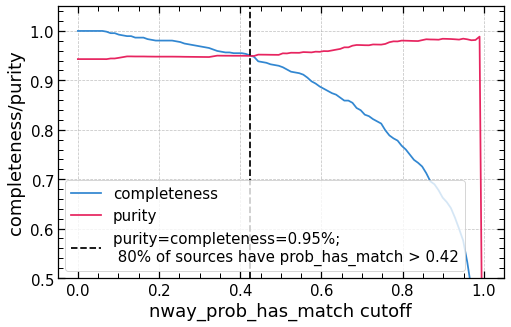

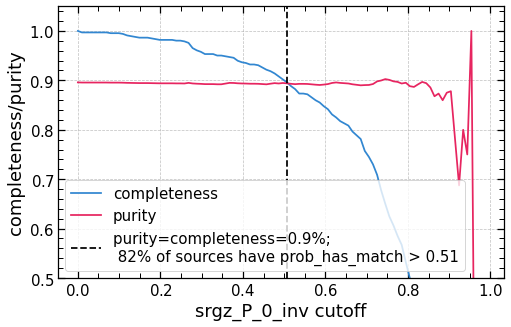

In [342]:

def assess_goodnes_cross_match(df, plot_res = True, calibration_column = 'srgz_P_0_inv',
                                desi_id_col = 'srgz_desi_id'):
    # calibration_column = 'srgz_P_0_inv' for srgz, 'nway_prob_has_match' for nway 
    # desi_id_col = 'srgz_desi_id' for srgz, 'nway_desi_id' for nway   
    print("="*20)
    print('cross_match PERFOMANCE ON THE VALIDATION CATALOG')
    df = df.copy()
    test_df_matched = df[~df.desi_id_true_ctp.isna()]

    test_df_matched.loc[:, 'cross_match_equal_true'] = test_df_matched[desi_id_col] == test_df_matched.desi_id_true_ctp


    cutoffs = np.linspace(df[calibration_column].min(),df[calibration_column].max(),100)

    def calcu_stats(test_df_matched, cutoffs):
        total_ctps = len(test_df_matched)
        completeness = []
        purity = []
        for p in cutoffs:
            cutoff_mask = test_df_matched[calibration_column] > p
            true_check_mask = test_df_matched.cross_match_equal_true

            n_assigned_ctps = len(test_df_matched[cutoff_mask])
            if n_assigned_ctps == 0:
                C = 0
                P = 0
            else:
                true_assignment = len(test_df_matched[cutoff_mask & true_check_mask])
                false_assingment = len(test_df_matched[cutoff_mask & ~true_check_mask])

                C = n_assigned_ctps / total_ctps

                P = true_assignment / n_assigned_ctps

            completeness.append(C)
            purity.append(P)
        completeness = np.array(completeness)
        purity = np.array(purity)
        return cutoffs, completeness, purity

    cutoffs, completeness, purity = calcu_stats(test_df_matched, cutoffs)

    print('Completeness and purity for cross_match matching \n'+ 'completeness = fraction of sources with prob_has_match > p \n' + 'purity = fraction of sources with prob_has_match > p and correct cross_match assignment')

    plt.figure(figsize=(8,5))
    plt.plot(cutoffs, completeness, label='completeness')
    plt.plot(cutoffs, purity, label='purity')

    cutoff_intersection, completeness_intersection, purity_intersection = find_completeness_purity_intercept(cutoffs, completeness, purity)

    frac_src_p_any_over = (df[calibration_column] > cutoff_intersection ).astype(int).mean()
    frac_src_p_any_over = np.round(frac_src_p_any_over*100, 2)


    plt.axvline(cutoff_intersection, color='k', ls='--', label=f'purity=completeness={completeness_intersection:.2g}%; \n {frac_src_p_any_over:.2g}% of sources have prob_has_match > {cutoff_intersection:.2g}')

    plt.legend()
    plt.ylim(0.5, 1.05)
    plt.xlabel(calibration_column+ ' cutoff')
    plt.ylabel('completeness/purity')

    print(f" Completeness = {100*completeness_intersection:.2g}% \n Purity = {100*purity_intersection:.2g}% \n prob_has_match optimal cutoff =  {cutoff_intersection:.2g} \n Fraction of sources with prob_has_match > {cutoff_intersection:.2g} = {frac_src_p_any_over:.2g}%")


    cutoff_mask = test_df_matched[calibration_column] > cutoff_intersection
    true_check_mask = test_df_matched.cross_match_equal_true

    n_assigned_ctps = len(test_df_matched[cutoff_mask])

    true_assignment = len(test_df_matched[cutoff_mask & true_check_mask])
    false_assingment = len(test_df_matched[cutoff_mask & ~true_check_mask])

    matches = test_df_matched[cutoff_mask]



    # print('+++Statistics+++')
    # print(f"{len(test_df_matched)} X-ray sources in validation set with counterparts") 
    # print(f"--Out of those, {len(test_df_matched)-n_assigned_ctps} sources were assigned hostless (prob_has_match < {cutoff_intersection:.2g}) ")
    # print(f"{n_assigned_ctps} sources have prob_has_match > {cutoff_intersection:.2g}")
    # print(f'Out of those {n_assigned_ctps}: ')
    # print(f"--{true_assignment} sources have correct cross_match counterpart")
    # print(f"--{false_assingment} sources have incorrect cross_match counterpart")


    if not plot_res:
        plt.close()

    return matches


matches_nway = assess_goodnes_cross_match(desi_nway, plot_res = True, calibration_column = 'nway_prob_has_match', desi_id_col='nway_desi_id');

matches_srgz  = assess_goodnes_cross_match(desi_srgz.query('0<=srgz_P_0<=1'), plot_res = True, calibration_column = 'srgz_P_0_inv', desi_id_col='srgz_desi_id');

print('#################')


-----

# Compare offsets

In [343]:
desi_srgz_dist_only

,srcname_fin,flux_05-20,srgz_separation,sigma_DL,srgz_pc_DL,srgz_desi_id,srgz_p_pos,srgz_p_plim,srgz_is_pos_most_probable,srgz_is_phot_most_probable,srgz_P_0,srgz_is_closest,srgz_is_within_pos_r98,srgz_P_0_inv,desi_id_true_ctp
1,SRGe J110820.3+584414,1.587857e-13,7.837014,1.435845,0.996546,9011_613780_294,0.000005,0.000008,True,False,0.999999,True,False,1.094006e-06,NaN
15,SRGe J110815.1+583836,3.119287e-14,8.847408,3.540798,0.809869,9011_613780_135,0.101597,0.164965,True,True,0.809436,True,True,1.905644e-01,NaN
29,SRGe J110757.2+590708,2.015407e-14,3.837570,3.758078,0.771233,9011_614528_202,0.574821,0.700354,True,True,0.260933,True,True,7.390665e-01,NaN
46,SRGe J110750.9+590607,2.137229e-14,3.761557,3.655334,0.789828,9011_614527_3718,0.586355,0.742528,True,True,0.226271,True,True,7.737293e-01,NaN
70,SRGe J110749.6+583509,2.755814e-14,8.194925,3.477878,0.820535,9011_613026_2352,0.142086,0.319205,True,True,0.712972,True,True,2.870279e-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135959,SRGe J101919.2+562429,2.764135e-14,0.650717,1.658096,0.991958,9011_606779_666,0.915483,0.983782,True,True,0.087720,True,True,9.122804e-01,NaN
135975,SRGe J101914.3+563109,1.124330e-14,8.580861,3.599048,0.799773,9011_606779_556,0.126190,0.247119,True,True,0.619477,True,True,3.805234e-01,NaN
135986,SRGe J101911.0+562639,1.273094e-14,15.145586,2.774878,0.919283,9011_606779_455,0.000001,0.000002,True,True,1.000000,True,False,4.474891e-07,NaN
135994,SRGe J101903.4+563325,2.122641e-14,9.594825,2.915717,0.902798,9011_606779_218,0.016563,0.018113,True,True,0.989743,True,False,1.025714e-02,NaN


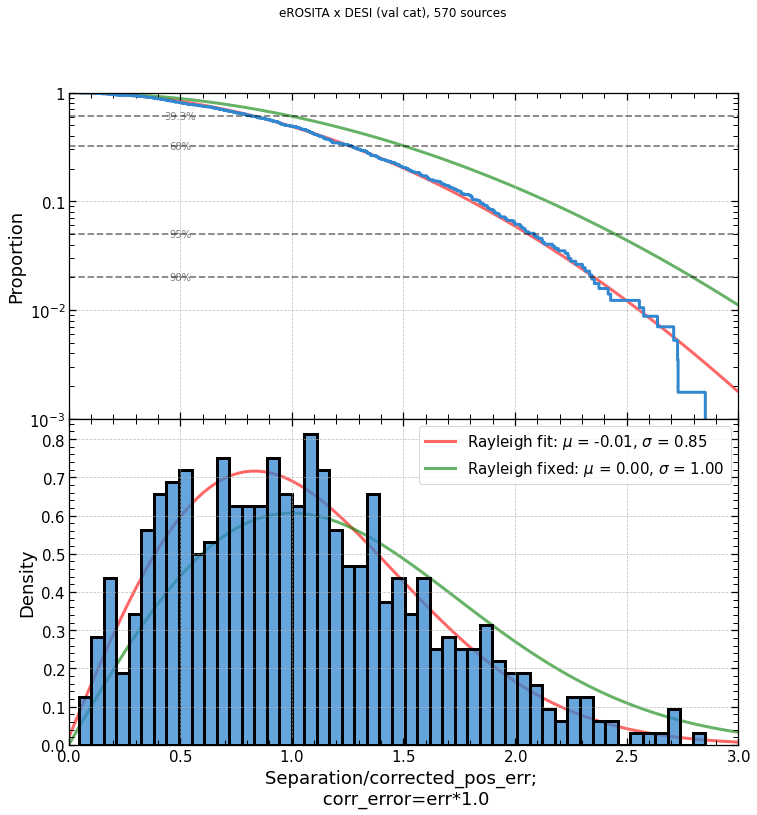

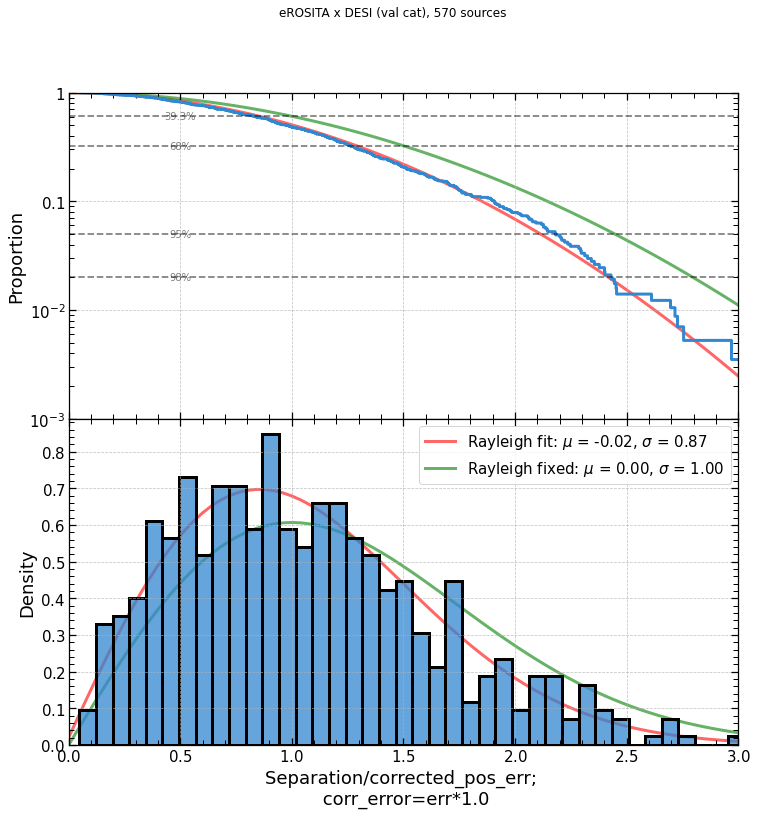

In [344]:
from scripts.cross_match_scripts import rayleigh_plot

rayleigh_plot(desi_nway_dist_only.query('nway_desi_id==desi_id_true_ctp'), sep_col='nway_Separation_EROSITA_DESI', pos_err_col = 'pos_sigma_2d', plotlabel='eROSITA x DESI (val cat)', xlim=(0, 3))


rayleigh_plot(desi_srgz_dist_only.query('srgz_desi_id==desi_id_true_ctp'), sep_col='srgz_separation', pos_err_col = 'sigma_DL', plotlabel='eROSITA x DESI (val cat)', xlim=(0, 3))



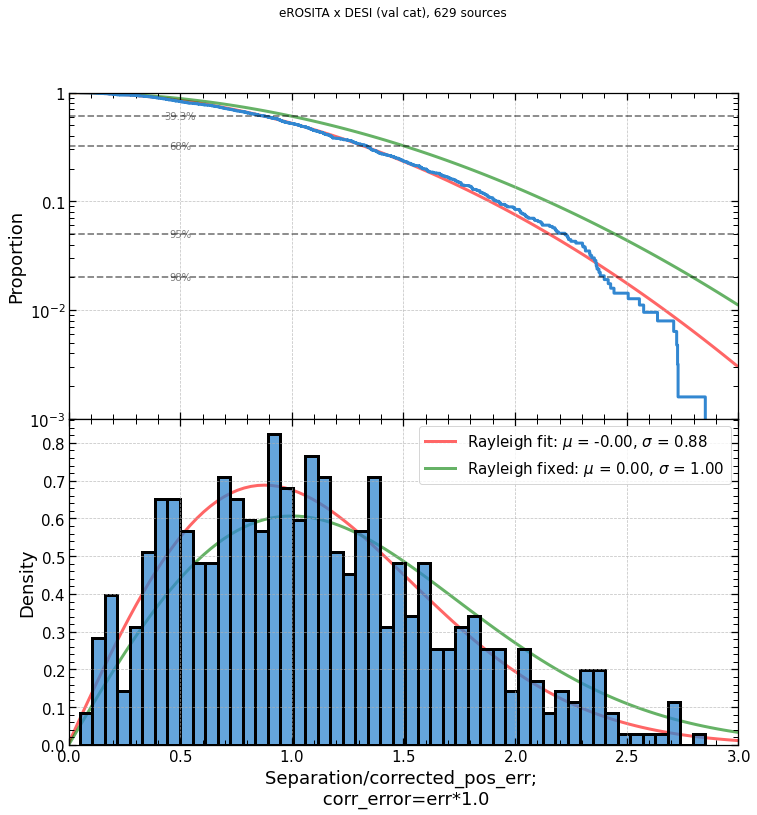

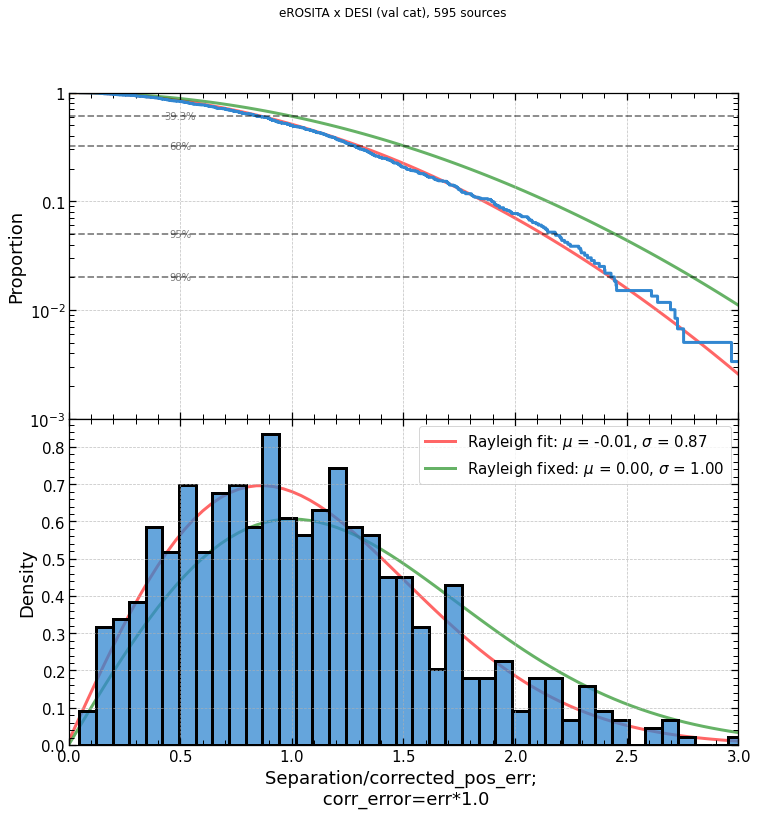

In [345]:

rayleigh_plot(desi_nway.query('nway_desi_id==desi_id_true_ctp'), sep_col='nway_Separation_EROSITA_DESI', pos_err_col = 'pos_sigma_2d', plotlabel='eROSITA x DESI (val cat)', xlim=(0, 3))


rayleigh_plot(desi_srgz.query('srgz_desi_id==desi_id_true_ctp'), sep_col='srgz_separation', pos_err_col = 'sigma_DL', plotlabel='eROSITA x DESI (val cat)', xlim=(0, 3))


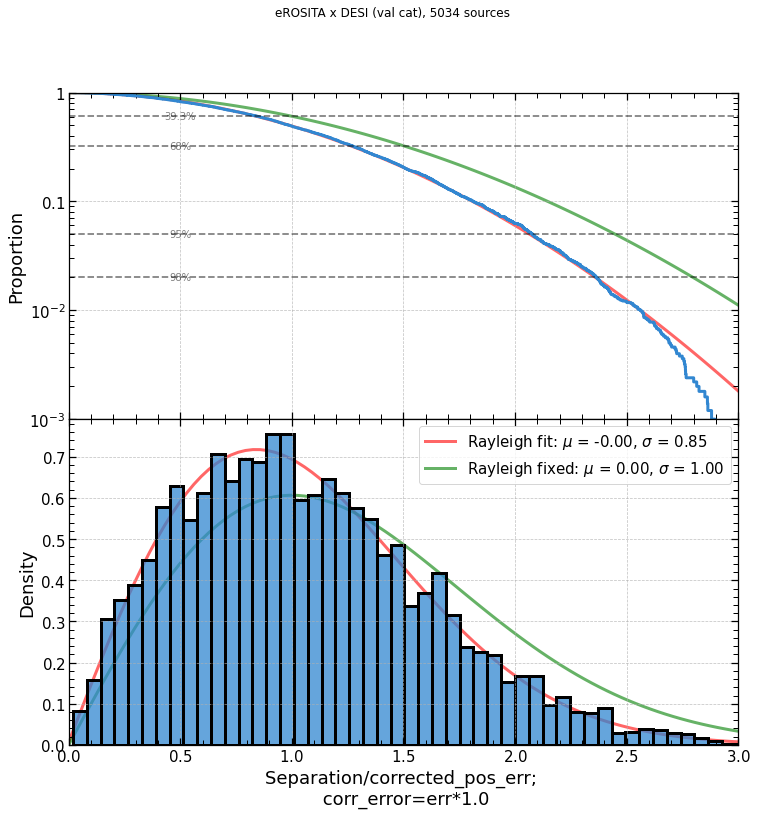

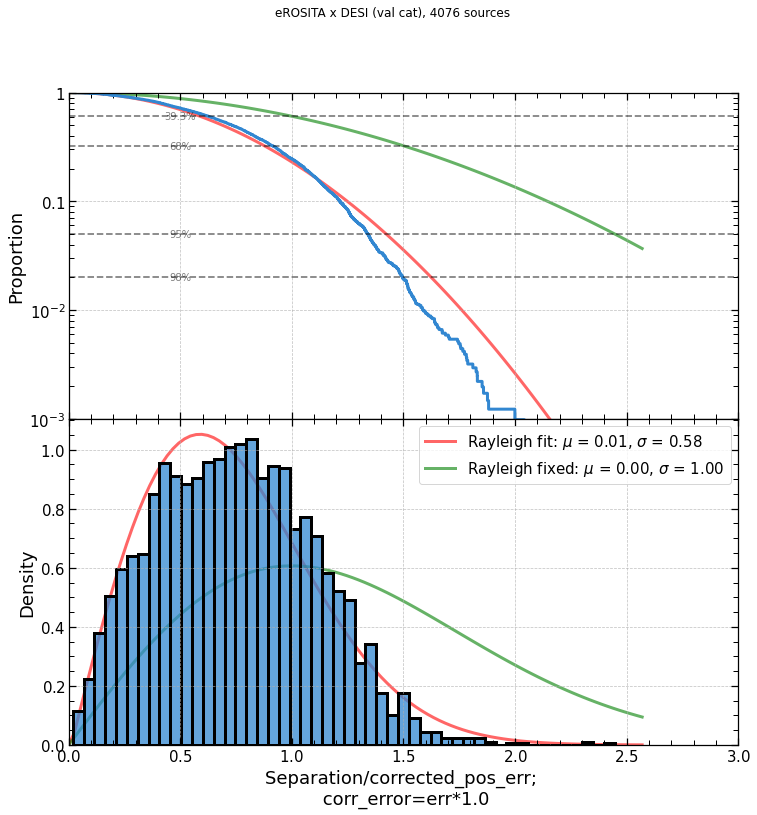

In [346]:

rayleigh_plot(desi_nway.query('nway_prob_has_match>0.8'), sep_col='nway_Separation_EROSITA_DESI', pos_err_col = 'pos_sigma_2d', plotlabel='eROSITA x DESI (val cat)', xlim=(0, 3))


rayleigh_plot(desi_srgz.query('srgz_P_0_inv>0.8 & srgz_is_phot_most_probable==1'), sep_col='srgz_separation', pos_err_col = 'sigma_DL', plotlabel='eROSITA x DESI (val cat)', xlim=(0, 3))
